In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (13, 5)

Train dataset

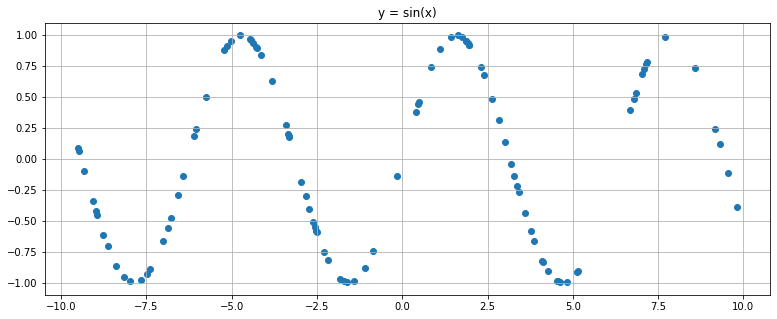

In [2]:
x_train = torch.rand(100)
x_train = x_train * 20 - 10
y_train = torch.sin(x_train)
plt.scatter(x_train, y_train)
plt.grid()
plt.title('y = sin(x)')
plt.show()

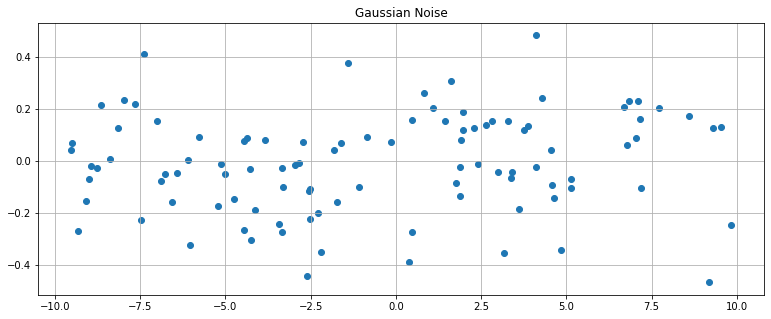

In [3]:
noise = torch.randn(y_train.shape) / 5
plt.scatter(x_train.numpy(), noise.numpy())
plt.grid()
plt.title('Gaussian Noise')
plt.show()

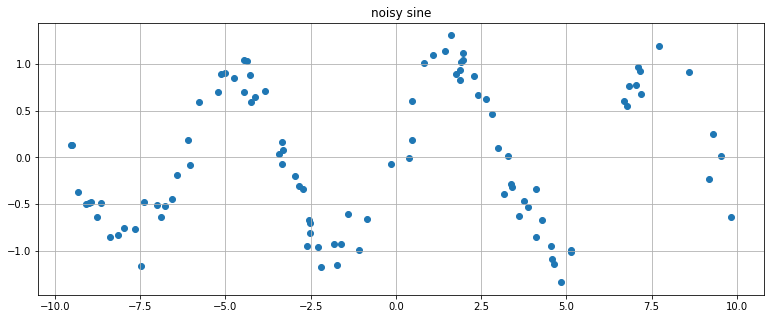

In [4]:
y_train += noise
plt.scatter(x_train, y_train)
plt.grid()
plt.title('noisy sine')
plt.show()

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

Validation dataset

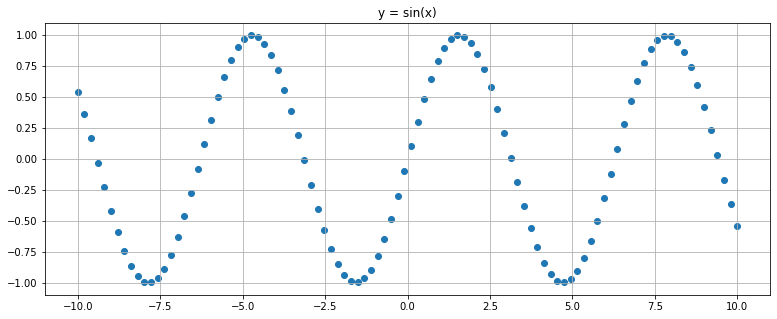

In [6]:
x_val = torch.linspace(-10, 10, 100)
y_val = torch.sin(x_val.data)
plt.scatter(x_val.numpy(), y_val.numpy())
plt.title('y = sin(x)')
plt.grid()
plt.show()

In [ ]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1)

Model construction

In [8]:
class SimpleNet(nn.Module):
  def __init__(self, hidden_layer):
    super(SimpleNet, self).__init__()
    self.fc1 = nn.Linear(1, hidden_layer)
    self.act = nn.Tanh()
    self.fc2 = nn.Linear(hidden_layer, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act(x)
    x = self.fc2(x)
    return x

Prediction

In [10]:
net = SimpleNet(50)

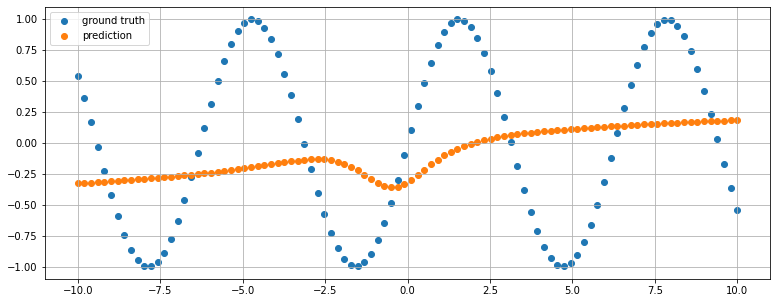

In [11]:
def predict(nn, x, y):
  output = nn(x)
  plt.scatter(x.numpy(), y.numpy(), label='ground truth')
  plt.scatter(x.numpy(), output.detach().numpy(), label='prediction')
  plt.legend(loc='upper left')
  plt.grid()
  plt.show()


predict(net, x_val, y_val)

In [84]:
def train(model, num_epochs, optimizer, x_train, y_train, x_val, y_val):
  train_epoch_loss = []
  val_epoch_loss = []

  for i in range(num_epochs):
    
    model.train()

    optimizer.zero_grad()
    output = model(x_train)
    loss_train = nn.functional.mse_loss(output, y_train)
    loss_train.backward()
    optimizer.step()

    train_epoch_loss.append(loss_train.item())

    model.eval()

    output = model(x_val)
    loss_val = nn.functional.mse_loss(output, y_val)
    val_epoch_loss.append(loss_val.item())

    if (i + 1) % 200 == 0:
      print(f'{i + 1}/{num_epochs}, train_loss: {loss_train}, val_loss: {loss_val}')
      print('_' * 10, end='\n\n')
    
  return model, train_epoch_loss, val_epoch_loss

In [13]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [14]:
net, train_history, val_history = train(net, 1000, optimizer, x_train, y_train, x_val, y_val)

200/1000, train_loss: 0.11076917499303818, val_loss: 0.1276022493839264
__________

400/1000, train_loss: 0.07341863960027695, val_loss: 0.09102556109428406
__________

600/1000, train_loss: 0.04801199957728386, val_loss: 0.06454220414161682
__________

800/1000, train_loss: 0.04039912670850754, val_loss: 0.050348006188869476
__________

1000/1000, train_loss: 0.030008340254426003, val_loss: 0.021223487332463264
__________



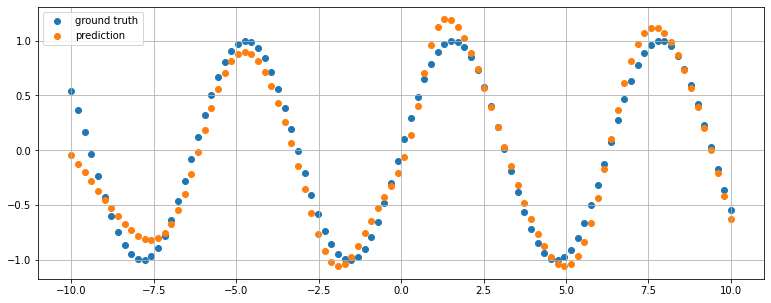

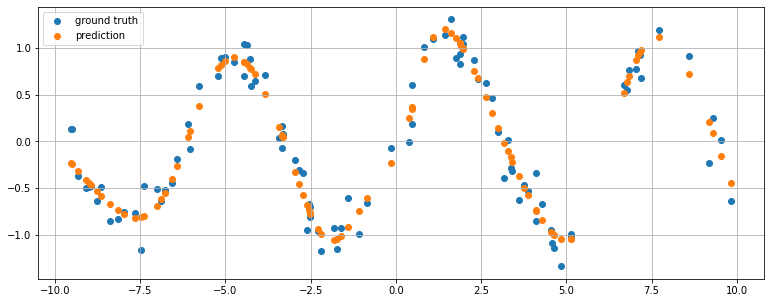

In [15]:
predict(net, x_val, y_val)
predict(net, x_train, y_train)

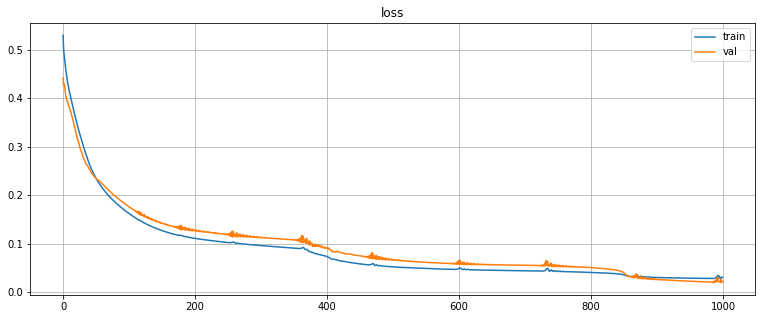

In [94]:
plt.plot(train_history, label='train')
plt.plot(val_history, label='val')
plt.legend()
plt.grid()
plt.title('loss')
plt.show()

Train dataset

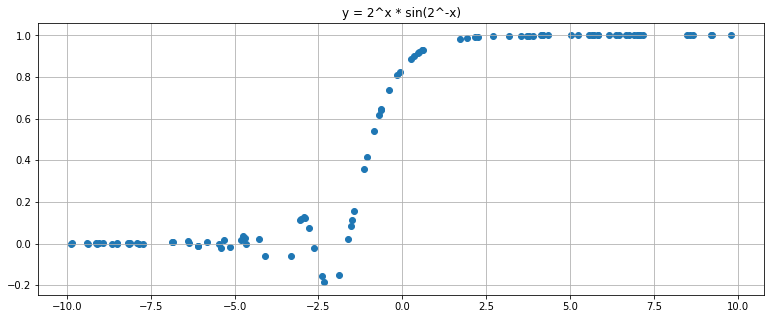

In [42]:
x_train = torch.rand(100)
x_train = x_train * 20 - 10
y_train = 2**x_train * torch.sin(2 ** (-1 * x_train))
plt.scatter(x_train, y_train)
plt.grid()
plt.title('y = 2^x * sin(2^-x)')
plt.show()

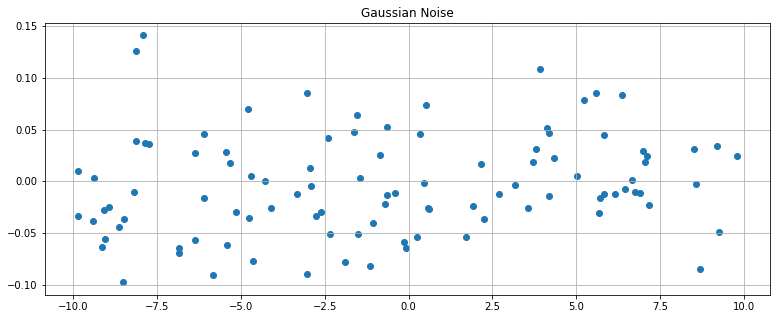

In [43]:
noise = torch.randn(y_train.shape) / 20
plt.scatter(x_train.numpy(), noise.numpy())
plt.grid()
plt.title('Gaussian Noise')
plt.show()

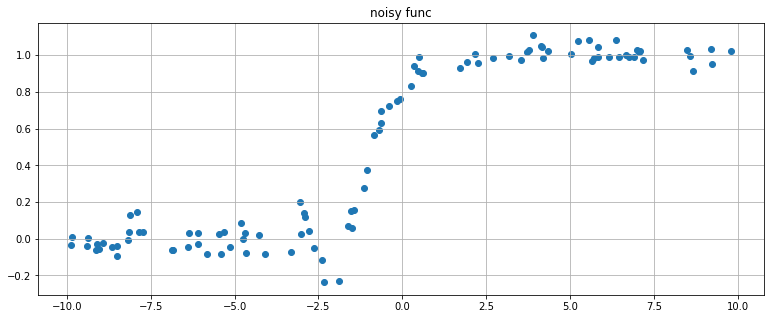

In [44]:
y_train += noise
plt.scatter(x_train, y_train)
plt.grid()
plt.title('noisy func')
plt.show()

Validation dataset

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

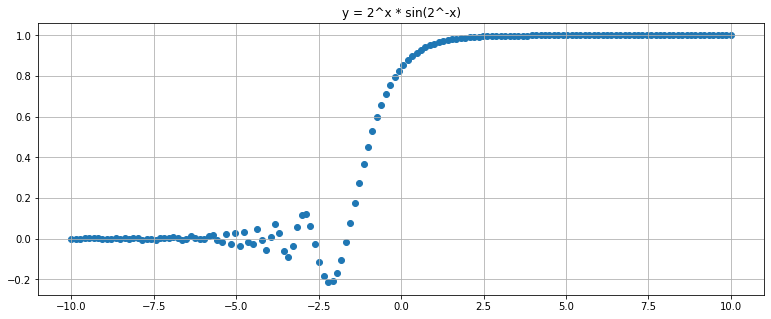

In [46]:
x_val = torch.linspace(-10, 10, 150)
y_val = 2**x_val.data * torch.sin(2**(-1 * x_val.data))
plt.scatter(x_val.numpy(), y_val.numpy())
plt.title('y = 2^x * sin(2^-x)')
plt.grid()
plt.show()

In [ ]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1)

Model construction

In [79]:
class SimpleNet1(nn.Module):
  def __init__(self, hidden_layer):
    super(SimpleNet1, self).__init__()
    self.fc1 = nn.Linear(1, hidden_layer)
    self.act = nn.Sigmoid()
    self.fc2 = nn.Linear(hidden_layer, hidden_layer)
    self.fc3 = nn.Linear(hidden_layer, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act(x)
    x = self.fc2(x)
    x = self.act(x)
    x = self.fc3(x)
    return x

In [80]:
net1 = SimpleNet1(50)

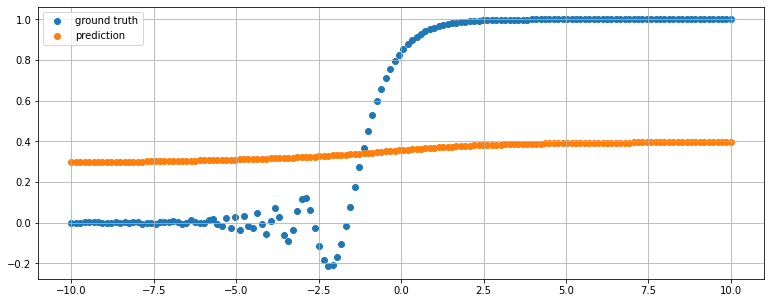

In [81]:
predict(net1, x_val, y_val)

In [85]:
def loss(output, y):
  x = (output - y).abs().mean()
  return x

In [86]:
def train(model, num_epochs, optimizer, x_train, y_train, x_val, y_val):
  train_epoch_loss = []
  val_epoch_loss = []

  for i in range(num_epochs):
    
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss_train = loss(output, y_train)
    loss_train.backward()
    optimizer.step()

    train_epoch_loss.append(loss_train.item())

    model.eval()
    output = model(x_val)
    loss_val = loss(output, y_val)
    
    val_epoch_loss.append(loss_val.item())

    if (i + 1) % 200 == 0:
      print(f'{i + 1}/{num_epochs}, train_loss: {loss_train}, val_loss: {loss_val}')
      print('_' * 10, end='\n\n')
    
  return model, train_epoch_loss, val_epoch_loss

Prediction

In [87]:
optimizer = torch.optim.Adam(net1.parameters(), lr=0.01)

In [88]:
net1, history_train1, history_val1 = train(net1, 1500, optimizer, x_train, y_train, x_val, y_val)

200/1500, train_loss: 0.050427407026290894, val_loss: 0.030439164489507675
__________

400/1500, train_loss: 0.04764598235487938, val_loss: 0.030392395332455635
__________

600/1500, train_loss: 0.045147284865379333, val_loss: 0.02661856636404991
__________

800/1500, train_loss: 0.04118727147579193, val_loss: 0.01996898651123047
__________

1000/1500, train_loss: 0.04189063236117363, val_loss: 0.02384500578045845
__________

1200/1500, train_loss: 0.03986406698822975, val_loss: 0.01844712719321251
__________

1400/1500, train_loss: 0.040640246123075485, val_loss: 0.02519431710243225
__________



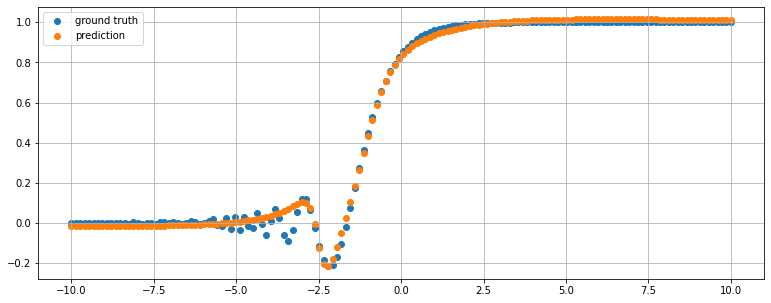

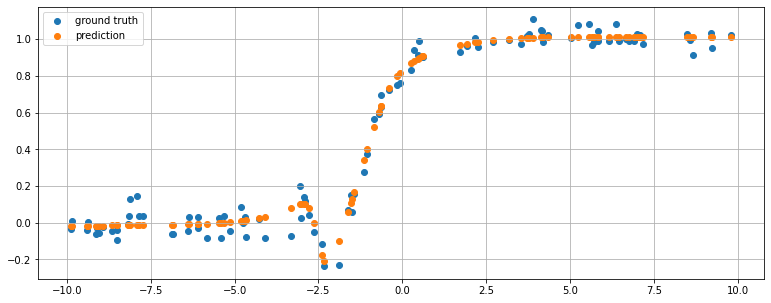

In [92]:
predict(net1, x_val, y_val)
predict(net1, x_train, y_train)

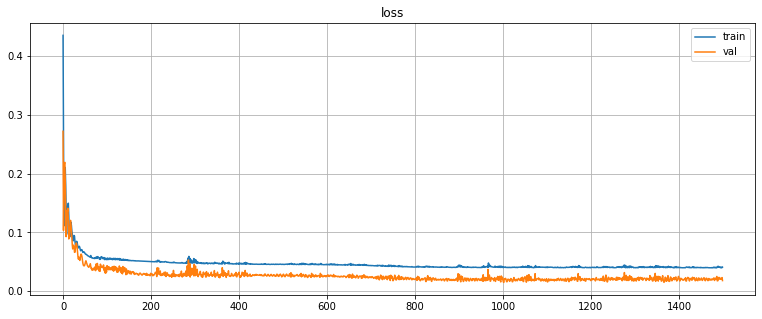

In [95]:
plt.plot(history_train1, label='train')
plt.plot(history_val1, label='val')
plt.legend()
plt.grid()
plt.title('loss')
plt.show()